In [1]:
from numpy import *
import pandas as pd
import pylab as p
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import vaex
import csv
from scipy.stats import norm #for gaussian
import os

from tqdm import tqdm
import subprocess as sub
import time

In [7]:
matplotlib.rcParams.update({'font.size': 14})

# Run Rockstar

In [36]:
# ---------------------------
# The parameter for this run
# ---------------------------

fof_b = 0.20
fof_f = 0.80

min_seed   = 10
min_output = 10
unb_thres  = 0

input_file = '/input/input_6d_5'

# -------------
# My directory
# -------------

path = '/net/virgo01/data/users/virgini/rockstar/RC3/output/'

value_f = str(round(fof_f*100))
value_b = str(round(fof_b*100))
value_n = str(min_output)
value_t = str(int(unb_thres*100))

dimension = '-6d'
tmp_part = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-particles')
tmp_subs = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-substructure')
tmp_pdf  = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '.pdf')

# ---------------------------------------------------
# Create the configuration file for running Rockstar
# ---------------------------------------------------

path_rs = '/net/virgo01/data/users/virgini/rockstar/RC3/'
name_rs = 'substructure'
tmp_cfg = os.path.join(path_rs, name_rs + '.cfg')

fh = open(tmp_cfg, 'w')
fh.write('FILE_FORMAT = "ASCII" \n')
fh.write('OUTPUT_FORMAT = "ASCII" \n')
fh.write('INBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/input" \n')
fh.write('OUTBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/output" \n')
fh.write('FULL_PARTICLE_CHUNKS = 1 \n')
fh.write('MIN_HALO_PARTICLES = ' + str(min_seed) + '\n')
fh.write('MIN_HALO_OUTPUT_SIZE = ' + str(min_output) + '\n')
fh.write('UNBOUND_THRESHOLD = ' + str(unb_thres) + '\n')
fh.write('FOF_LINKING_LENGTH = ' + str(fof_b) + '\n')
fh.write('FOF_FRACTION = ' + str(fof_f) + '\n')
fh.close()

# -------------
# Run Rockstar
# -------------

# start_time = time.time()

input_rs = os.path.join(path_rs + input_file)
popen = sub.Popen(['./rockstar', '-c', 'substructure.cfg', input_rs],stdout=sub.PIPE,stderr=sub.PIPE, cwd=path_rs)
output, errors = popen.communicate()
print(output, errors)

# print("--- %s seconds ---" % (time.time() - start_time))

b'' b''


In [37]:
# ----------------
# Rename the file
# ----------------

src_halo = os.path.join(path, 'halos_0.0.ascii')
dst_halo = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-halo')

src_part = os.path.join(path, 'halos_0.0.particles')
dst_part = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-particles')

os.rename(src_halo, dst_halo)
os.rename(src_part, dst_part)

In [38]:
# --------------
# Read the file
# --------------

dst_halo = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t0-halo'

hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
           'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
           'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
           'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
           'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
           'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
           'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
           'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']

dx = pd.read_csv(dst_halo, comment='#', sep=' ', names=hdr_sub)
dx.id.max()

71

In [3]:
t1 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f40-n10-t70-halo', seperator=' ')
t2 = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f40-n10-t50-halo', seperator=' ')

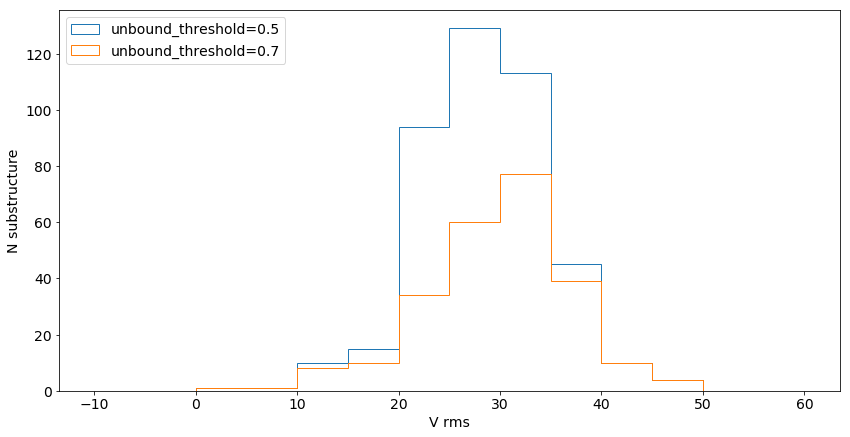

In [15]:
p.figure(figsize=(14,7))
p.hist(t2.evaluate('vrms'), bins=arange(-10,65,5), histtype='step', label='unbound_threshold=0.5')
p.hist(t1.evaluate('vrms'), bins=arange(-10,65,5), histtype='step', label='unbound_threshold=0.7')
p.xlabel('V rms'), p.ylabel('N substructure')
p.legend(loc='upper left');
p.savefig('/Users/users/virgini/Desktop/v_rms.png', format='png')

In [74]:
t1.evaluate('sqrt(vx**2 + vy**2 + vz**2)', selection='id==0')

array([25.56377572])

In [20]:
hdr = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'rs_id', 'as_int_id', 'int_id', 'ext_id']
df  = pd.read_csv(tmp_part, sep=' ', comment='#', names=hdr)

In [21]:
df.head()

,x,y,z,vx,vy,vz,rs_id,as_int_id,int_id,ext_id
0,-0.161578,-0.047354,-0.150731,27.296129,-29.607311,-9.212117,24892,0,0,0
1,-0.154177,-0.053638,-0.151844,-11.698462,-19.707170,-12.113938,23604,0,0,0
2,-0.166757,-0.051655,-0.152518,-3.578721,-7.201449,-6.213304,23703,0,0,0
3,-0.162430,-0.049398,-0.153634,-3.641848,5.582477,-13.681236,24825,0,0,0
4,-0.156460,-0.050134,-0.154643,22.249971,20.892517,-28.912642,23615,0,0,0


## Read the data

In [34]:
hdr = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'rs_id', 'as_int_id', 'int_id', 'ext_id']
df  = pd.read_csv(tmp_part, sep=' ', comment='#', names=hdr)

# ------------------------------------------
# Select the deepest level of substructures
# ------------------------------------------

cond1 = (df.as_int_id == df.int_id) & (df.ext_id != -1)
df1 = df[cond1]

# ------------------------------
# Calculate galactic coordinate
# ------------------------------

df = df1
ds = vaex.from_pandas(df)
ds.add_virtual_columns_cartesian_to_spherical(alpha='l180')
ds.add_virtual_column("l", "(l180+360)%360")

## Create database of substructures

In [ ]:
df = df1

with open(tmp_subs,'w') as f:
    wr = csv.writer(f, delimiter=' ', lineterminator='\n',)
    for i in range(max(df.ext_id)):
        idx = df.ext_id == i
        selectionstr = 'ext_id=='+str(i)
        ds.select(selectionstr, name='sub') 
        s_id = str(i+1)
        nump = len(df.ext_id[idx])
        dist = ds.evaluate('distance', selection='sub').mean()
        sigm = ds.evaluate('distance', selection='sub').std()
        gall = ds.evaluate('l', selection='sub').mean() #+180
        stdl = ds.evaluate('l', selection='sub').std()
        galb = ds.evaluate('b', selection='sub').mean()
        stdb = ds.evaluate('b', selection='sub').std()
        meanx = ds.evaluate('x', selection='sub').mean()
        meany = ds.evaluate('y', selection='sub').mean()
        meanz = ds.evaluate('z', selection='sub').mean()
        xmax = max(abs(df.x[idx]-meanx))
        ymax = max(abs(df.y[idx]-meany))
        zmax = max(abs(df.z[idx]-meanz))
        rmax = sqrt(xmax*xmax+ymax*ymax+zmax*zmax)
        diam = round(2*rmax*1e3, 2)
        vel = sqrt(df.vx[idx]**2+df.vy[idx]**2+df.vz[idx]**2)
        meanv = mean(vel)
        stdv  = sqrt((std(df.vx[idx]**2)+std(df.vy[idx]**2)+std(df.vz[idx]**2))/3)        
        wr.writerow([s_id, nump, dist, sigm, meanv, stdv, gall, stdl, galb, stdb, diam])

hdr_sub = ['sub_id', 'num_p','mean_d', 'std_d', 'mean_v', 'std_v', 'l', 'std_l','b', 'std_b', 'diam']
f = pd.read_csv(tmp_subs, sep=' ', comment='#', names=hdr_sub) 

In [ ]:
for i in range(10):
    if f.l[i] < 0:
        print(f.l[i]+360)

## What is the smallest diameter of the substructure?

In [ ]:
diam_min, diam_max = min(f.diam), max(f.diam)
print(diam_min, 'pc', diam_max, 'pc')

In [ ]:
diam = 0.2 #kpc
width = diam*1e3
int(width)

# Velocity dispersion

In [ ]:
tmp_f = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f70-n10-t70-substructure'
f = pd.read_csv(tmp_f, sep=' ', comment='#', names=hdr_sub)
p.hist(f.std_v, label='b 0.10 \nf  0.70')
p.legend(frameon=False)
p.show()

(len(f[f.std_v <= 20])/len(f))*100, (len(f[f.std_v <= 10])/len(f))*100, (len(f[f.std_v <= 5])/len(f))*100
# f[f.std_v <= 5]

## Plot all substructures

In [75]:
# Taken from notebook py-13

id_1 = [100, 145, 204, 206, 207, 210, 213]
id_2 = [205, 206, 208, 209, 211, 212, 213, 215, 218]
id_3 = [1, 2, 3, 4, 5, 7, 10, 13, 17, 18, 22, 25, 28, 35]
id_4 = [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 29, 31, 34, 42, 43]

my_id = id_4
my_exp = 4

In [35]:
tmp_pdf

'/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t70-6d.pdf'

In [36]:
print(input_rs)


df = df1
diam = 0.150 #kpc
width = int(diam*2*1e3)

with PdfPages(tmp_pdf) as pdf:
    
    for i in tqdm(range(max(df.ext_id)+1), desc='Loading...'):
        idx = df.ext_id == i
        selectionstr = 'ext_id=='+str(i)
        ds.select(selectionstr, name='sub')
       
        if len(df.ext_id[idx]) < 1000:
        
            fig = p.figure(figsize=(14,20))

            # ------------------------------------
            # first plot: distribution in the sky
            # ------------------------------------

            gs1 = p.GridSpec(ncols=4, nrows=3)
            gs1.update(left=0.05, right=0.95)

            p.subplot(gs1[0,:])

            p.title('Substructure %s' %(str(i)), fontsize='x-large')
            ds.scatter(x='l', y='b', selection='sub', s=3, length_check=False)
            p.text(10, 75, 'Number of stars : %s' %len(df.ext_id[idx]))
            dist = round(ds.evaluate('distance', selection='sub').mean(), 2)
            sigm = round(ds.evaluate('distance', selection='sub').std(), 2)
            p.text(10, 65, 'Distance : %s $\pm$ %s kpc' %(dist, sigm))
            gall = round(ds.evaluate('l', selection='sub').mean(), 2)
            galb = round(ds.evaluate('b', selection='sub').mean(), 2)
            p.text(10, 55, 'Mean position (l,b) : %s, %s' %(gall, galb))
            p.text(315, 75, '3D FOF $b$ : %s' %fof_b)
            p.text(315, 65, '6D FOF $f$  : %s' %fof_f)
            p.xlim(0,360)
            p.ylim(-90,90)
            gs1.tight_layout(fig)

            # ------------------------------------------
            # second plot: position and velocity vector
            # ------------------------------------------

            p.subplot(gs1[1,:-2])

            ds.scatter(x='x', y='y', selection='sub', s=16, length_check=False)  # position

            meanx = ds.evaluate('x', selection='sub').mean()                    # center of position
            meany = ds.evaluate('y', selection='sub').mean()
            meanz = ds.evaluate('z', selection='sub').mean()
            p.scatter(x=meanx, y=meany, c='red', s=100, marker='x')  

            tmpx  = ds.evaluate('x', selection='sub')                           # velocity vector
            tmpy  = ds.evaluate('y', selection='sub')
            tmpz  = ds.evaluate('z', selection='sub')
            tmpvx = ds.evaluate('vx', selection='sub') / 1000
            tmpvy = ds.evaluate('vy', selection='sub') / 1000
            tmpvz = ds.evaluate('vz', selection='sub') / 1000
            for j in range(ds.selected_length('sub')):
                p.arrow(tmpx[j], tmpy[j], dx=tmpvx[j], dy=tmpvy[j], width=0, head_width=0.0005, fc='black')

            p.xlabel('x [kpc]', fontsize=12)
            p.ylabel('y [kpc]', fontsize=12)
            p.xlim(meanx-diam, meanx+diam)
            p.ylim(meany-diam, meany+diam)
            p.title('Box size = %s pc x %s pc' %(width, width), loc='left')
            circle_50  = p.Circle((meanx,meany), radius=0.050, ec='red', fc='none', label='rad 50 pc')
            p.gca().add_patch(circle_50)
            circle_100 = p.Circle((meanx,meany), radius=0.100, ec='blue', fc='none', label='rad 100 pc')
            p.gca().add_patch(circle_100)
            p.legend(frameon=False)


            p.subplot(gs1[1,-2:])
            ds.scatter(x='z', y='y', selection='sub', s=16, length_check=False)

            p.xlabel('z [kpc]', fontsize=12)
            p.ylabel('y [kpc]', fontsize=12, visible=False)
            p.xlim(meanz-diam, meanz+diam)
            p.ylim(meany-diam, meany+diam)
            circle_50  = p.Circle((meanz,meany), radius=0.050, ec='red', fc='none', label='rad 50 pc')
            p.gca().add_patch(circle_50)
            circle_100 = p.Circle((meanz,meany), radius=0.100, ec='blue', fc='none', label='rad 100 pc')
            p.gca().add_patch(circle_100)
            p.legend(frameon=False)

            p.scatter(x=meanz, y=meany, c='red', s=100, marker='x')
            for j in range(ds.selected_length('sub')):
                p.arrow(tmpz[j], tmpy[j], dx=tmpvz[j], dy=tmpvy[j], width=0, head_width=0.0005, fc='black')

            gs1.tight_layout(fig, rect=[0.05, 0.05, 0.95, 0.95]) #left, bottom, right, top

            # ----------------------------------
            # third plot: velocity distribution
            # ----------------------------------

            gs2 = p.GridSpec(ncols=3, nrows=1)
            gs2.update(top=0.30, bottom=0.05)

            fig.add_subplot(gs2[0,0])

            h,b,_ = p.hist(df.vx[idx], histtype='bar', ec='k', fc='w')
            norm_const = trapz(h, [0.5*(b[i]+b[i+1]) for i in range(len(b)-1)])
            meanvx = ds.evaluate('vx', selection='sub').mean()
            sigvx  = ds.evaluate('vx', selection='sub').std()
            p.axvline(x=meanvx, ls='--', color='red')
            p.xlabel('$v_x$ [km/s]', fontsize=12)
            p.ylabel('N', fontsize=12)
            p.title('$\mu = %s , \sigma = %s$' %(round(meanvx, 2), round(sigvx,2)), loc='left', fontsize=10)
            x = linspace(min(df.vx[idx]), max(df.vx[idx]), num=50)
            y = norm.pdf(x, meanvx, sigvx)
            p.plot(x,norm_const*y)

            fig.add_subplot(gs2[0,1])
            h, b, _ = p.hist(df.vy[idx], histtype='bar', ec='k', fc='w')
            norm_const = trapz(h, [0.5*(b[i]+b[i+1]) for i in range(len(b)-1)])
            meanvy = ds.evaluate('vy', selection='sub').mean()
            sigvy = ds.evaluate('vy', selection='sub').std()
            p.axvline(x=meanvy, ls='--', color='red')
            p.xlabel('$v_y$ [km/s]', fontsize=12)
            p.title('$\mu = %s , \sigma = %s$' %(round(meanvy, 2), round(sigvy,2)), loc='left', fontsize=10)
            x = linspace(min(df.vy[idx]), max(df.vy[idx]), num=50)
            y = norm.pdf(x, meanvy, sigvy)
            p.plot(x,norm_const*y)

            fig.add_subplot(gs2[0,2])
            h, b, _ = p.hist(df.vz[idx], histtype='bar', ec='k', fc='w')
            norm_const = trapz(h, [0.5*(b[i]+b[i+1]) for i in range(len(b)-1)])
            meanvz = ds.evaluate('vz', selection='sub').mean()
            sigvz = ds.evaluate('vz', selection='sub').std()
            p.axvline(x=meanvz, ls='--', color='red')
            p.xlabel('$v_z$ [km/s]', fontsize=12)
            p.title('$\mu = %s , \sigma = %s$' %(round(meanvz, 2), round(sigvz,2)), loc='left', fontsize=10)
            x = linspace(min(df.vz[idx]), max(df.vz[idx]), num=50)
            y = norm.pdf(x, meanvz, sigvz)
            p.plot(x,norm_const*y)

            gs2.tight_layout

            pdf.savefig()
            p.close()

print('finish')

Loading...:   0%|          | 0/48 [00:00<?, ?it/s]

/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_5_corrected


Loading...: 100%|██████████| 48/48 [00:49<00:00,  1.02s/it]

finish


## Velocity of the substructures

In [26]:
tmp_sub1 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f40-n10-t70-halo'
tmp_sub2 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b05-f80-n10-t70-halo'
tmp_sub3 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f40-n10-t70-halo'
tmp_sub4 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t70-halo'
tmp_sub5 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b70-f40-n10-t70-halo'
tmp_sub6 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b70-f80-n10-t70-halo'

hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
           'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
           'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
           'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
           'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
           'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
           'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
           'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']

df_sub1 = pd.read_csv(tmp_sub1, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])
df_sub2 = pd.read_csv(tmp_sub2, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])
df_sub3 = pd.read_csv(tmp_sub3, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])
df_sub4 = pd.read_csv(tmp_sub4, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])
df_sub5 = pd.read_csv(tmp_sub5, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])
df_sub6 = pd.read_csv(tmp_sub6, comment='#', sep=' ', names=hdr_sub, usecols=['x', 'y', 'z', 'vx', 'vy', 'vz', 'num_p'])

## Heliocentric

In [38]:
# Change k to choose which df_sub and title we want to use
k = 5

df_sub_all = [df_sub1, df_sub2, df_sub3, df_sub4, df_sub5, df_sub6]
title = ['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']

df_sub = df_sub_all[k]

# Don't forget to change the name, too :)
png_hel = '/net/virgo01/data/users/virgini/rockstar/RC3/output/Exp6-vel-subs-hel.png'

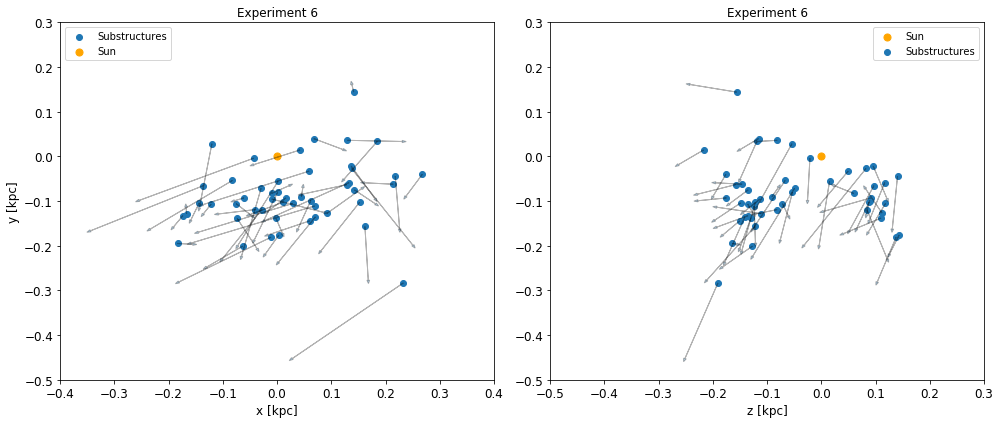

In [39]:
fig = p.figure(figsize=(14,6))

p.subplot(121)
for k in [5]:
    df_sub = df_sub_all[k]
    for i in range(len(df_sub)):
        p.arrow(df_sub.x[i], df_sub.y[i], df_sub.vx[i]*0.005, df_sub.vy[i]*0.005, width=0, head_width=0.005, alpha=0.3)
    p.scatter(df_sub.x, df_sub.y, label='Substructures')
p.scatter(0,0, c='orange', s=50, label='Sun')
p.xlabel('x [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.xlim(-0.4, 0.4), p.ylim(-0.5, 0.3)
p.tick_params(labelsize='large')
p.title(title[k], fontsize='large')
p.legend(loc='upper left')

p.subplot(122)
for i in range(len(df_sub)):
    p.arrow(df_sub.z[i], df_sub.y[i], df_sub.vz[i]*0.005, df_sub.vy[i]*0.005, width=0, head_width=0.005, alpha=0.3)
p.scatter(0,0, c='orange', s=50, label='Sun')
p.scatter(df_sub.z, df_sub.y, label='Substructures')
p.xlabel('z [kpc]', fontsize='large')
p.xlim(-0.5, 0.3), p.ylim(-0.5, 0.3)
p.tick_params(labelsize='large')
p.title(title[k], fontsize='large')
p.legend()

fig.tight_layout()
p.savefig(png_hel, format='png')
p.show(fig)

## Galactocentric

In [ ]:
# Change k to choose which df_sub and title we want to use
k = 3

df_sub_all = [df_sub1, df_sub2, df_sub3, df_sub4]
title = ['Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4']

df_sub = df_sub_all[k]

# Don't forget to change the name, too :) 
png_gal = '/net/virgo01/data/users/virgini/rockstar/RC3/output/Exp4-vel-subs-gal.png'  #!! Change this

In [ ]:
# We need to convert the result into galactocentric coordinate to see how it behaves in the disk

vx_sun = 11.1
vy_sun = 12.24
vz_sun = 7.25
vy_cir = 220
R0 = -8

df_sub.vx_gal = df_sub.vx + vx_sun
df_sub.vy_gal = df_sub.vy + vy_sun + vy_cir
df_sub.vz_gal = df_sub.vx + vz_sun
df_sub.x_gal  = df_sub.x  + R0

In [ ]:
fig = p.figure(figsize=(14,6))

p.subplot(121)
for i in range(len(df_sub)):
    p.arrow(df_sub.x_gal[i], df_sub.y[i], df_sub.vx_gal[i]*0.0005, df_sub.vy_gal[i]*0.0005, width=0, head_width=0.005, alpha=0.3)
p.scatter(-8,0, c='orange', s=50, label='Sun')
p.scatter(df_sub.x_gal, df_sub.y, c='green', label='Substructures')
p.xlabel('x [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.xlim(-8.4, -7.5), p.ylim(-0.4, 0.4)
p.tick_params(labelsize='large')
p.title('Experiment 4', fontsize='large')   #!! Change this
p.legend(loc='upper left')

p.subplot(122)
for i in range(len(df_sub)):
    p.arrow(df_sub.z[i], df_sub.y[i], df_sub.vz_gal[i]*0.0005, df_sub.vy_gal[i]*0.0005, width=0, head_width=0.005, alpha=0.3)
p.scatter(0,0, c='orange', s=50, label='Sun')
p.scatter(df_sub.z, df_sub.y, c='green', label='Substructures')
p.xlabel('z [kpc]', fontsize='large')
p.xlim(-0.4, 0.3), p.ylim(-0.4, 0.4)
p.tick_params(labelsize='large')
p.title('Experiment 4', fontsize='large')   #!! Change this
p.legend()

fig.tight_layout()
p.savefig(png_gal, format='png')
p.show(fig)

## Colorful

In [ ]:
fig = p.figure(figsize=(17,8))
p.suptitle('Plot of all substructures (galactocentric coordinate)', fontsize='xx-large')

p.subplot(121)
p.scatter(-8,0, c='orange', s=50, label='Sun')
labels = {'l1' : '0   < n$_{star}$ < 50', 'l2' : '50 < n$_{star}$ < 100', 'l3' : 'n$_{star}$ > 100'}

for i in range(len(df_sub)):
    if df_sub.num_p[i] <= 50:
        p.scatter(df_sub.x[i], df_sub.y[i], s=20, c='blue', label=labels['l1'])
        labels['l1'] = '_nolegend_'
    if df_sub.num_p[i] >= 51:
        p.scatter(df_sub.x[i], df_sub.y[i], s=20, c='green', label=labels['l2'])
        labels['l2'] = '_nolegend_'
    if df_sub.num_p[i] > 100:
        p.scatter(df_sub.x[i], df_sub.y[i], s=20, c='red', label=labels['l3'])
        labels['l3'] = '_nolegend_'
            
for k in range(len(df_sub)):
    p.arrow(df_sub.x[k], df_sub.y[k], df_sub.vx[k]*0.0001, df_sub.vy[k]*0.0001,\
            width=0, head_width=0.005, ec='grey')

p.xlabel('x [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.xlim(-8.4, -7.6), p.ylim(-0.5, 0.3)
p.title('3D FOF = 0.1 \n6D FOF = 0.9 \n', loc='left', fontsize='large')
p.legend()

p.subplot(122)
p.scatter(0,0, c='orange', s=50, label='Sun')
labels = {'l1' : '0   < n$_{star}$ < 50', 'l2' : '50 < n$_{star}$ < 100', 'l3' : 'n$_{star}$ > 100'}
for i in range(len(df_sub)):
    if df_sub.num_p[i] <= 50:
        p.scatter(df_sub.z[i], df_sub.y[i], s=20, c='blue', label=labels['l1'])
        labels['l1'] = '_nolegend_'
    if df_sub.num_p[i] >= 51:
        p.scatter(df_sub.z[i], df_sub.y[i], s=20, c='green', label=labels['l2'])
        labels['l2'] = '_nolegend_'
    if df_sub.num_p[i] > 100:
        p.scatter(df_sub.z[i], df_sub.y[i], s=20, c='red', label=labels['l3'])
        labels['l3'] = '_nolegend_'
p.legend()

for k in range(len(df_sub)):
    p.arrow(df_sub.z[k], df_sub.y[k], df_sub.vz[k]*0.0001, df_sub.vy[k]*0.0001,\
            width=0, head_width=0.005, ec='grey')

p.xlabel('z [kpc]', fontsize='large'), p.ylabel('y [kpc]', fontsize='large')
p.xlim(-0.5, 0.3), p.ylim(-0.5, 0.3)
p.show(fig)

fig2 = p.figure(figsize=(15,6))
p.suptitle('Velocity distribution of substructures (heliocentric coordinate)')
p.subplot(131), p.hist(df_sub.vx), p.xlabel('$v_x$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(132), p.hist(df_sub.vy), p.xlabel('v$_y$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.subplot(133), p.hist(df_sub.vz), p.xlabel('v$_z$', fontsize='large'), p.ylabel('$N$', fontsize='large')
p.show(fig2)

pdf = PdfPages('/net/virgo01/data/users/virgini/rockstar/RC3/output/b10-f90-n10-t70-xyz-coba.pdf')
pdf.savefig(fig)
pdf.savefig(fig2)
pdf.close()

In [ ]:
df_sub.shape

In [ ]:
p.hist(df_sub.vx, label='v$_x$'), p.legend(fontsize=16), p.show()
p.hist(df_sub.vy, label='v$_y$'), p.legend(fontsize=16), p.show()
p.hist(df_sub.vz, label='v$_z$'), p.legend(fontsize=16), p.show()

## Do we find Pleiades?

In [ ]:
ds.select('(l>150) & (l<179) & (b<-10) & (b>-30)', name='pleiades')

In [ ]:
pleiades_candidate = unique(ds.evaluate('ext_id', selection='pleiades'))

In [ ]:
print('Substructure', pleiades_candidate+1)

In [ ]:
print(max(f.num_p))

## Do we find NGC 2682?

In [ ]:
ds.select('(l<-140) & (l>-150) & (b>29) & (b<33)', name='ngc2682')

In [ ]:
pleiades_candidate = unique(ds.evaluate('ext_id', selection='ngc2682'))

In [ ]:
print('Substructure', 2682_candidate+1)

## Compare spatial distribution with RAVE OC

In [ ]:
# data of rave open cluster (refer to Conrad et al. 2014) 
tmp_roc = '/net/virgo01/data/users/virgini/rockstar/RC3/input/rave_oc'
hdr_roc = ['l', 'b', 'name', 'ra', 'dec']
df_roc  = pd.read_csv(tmp_roc, sep=';', comment='#', names=hdr_roc)

df_roc.head(5)

In [ ]:
# data of rockstar substructure
df_pos  = pd.read_csv(tmp_sub, sep=' ', comment='#', names=hdr_sub)

# check position of rave oc in ra_dec
p.figure(figsize=(14,7))
p.title('Spatial distribution of stars in OC areas covered by RAVE')
p.scatter(df_roc.ra, df_roc.dec, s=3, color='red')
p.xlabel('RA in deg')
p.ylabel('DEC in deg')
p.xlim(0, 360)
p.ylim(-90, 30)
p.show()

In [ ]:
# compare both in one plot
tmp_pos = '/net/virgo01/data/users/virgini/rockstar/RC3/output/0.0.position.pdf'
tmp_pos = '/net/virgo01/data/users/virgini/rockstar/RC3/output/output-8-spatdis.pdf'

with PdfPages(tmp_pos) as pdf:
    p.figure(figsize=(14,7))
    p.title('Spatial distribution')
    p.scatter(df_pos.l, df_pos.b, s=7, color='blue', label='Rockstar substructures')
    p.scatter(df_roc.l, df_roc.b, s=7, color='red', label='RAVE OC (Conrad et al. 2014)')
    p.xlim(0, 360)
    p.ylim(-90, 90)
    p.xlabel('Galactic longitude (l)')
    p.ylabel('Galactic latitutde (b)')
    p.legend(frameon=False, loc='upper left')
    pdf.savefig()

p.show()
print('finish')

# Colormap of velocity in XY plane and ZY plane

In [ ]:
ds = vaex.from_ascii('/net/virgo01/data/users/virgini/rockstar/RC3/input/input_6d_4_gal')

In [ ]:
ds.plot1d(ds.col.x, show=True), ds.min('x'), ds.max('x')
ds.plot1d(ds.col.y, show=True)
ds.plot1d(ds.col.z, show=True)

In [ ]:
ds.plot1d(ds.col.vx, show=True)
ds.plot1d(ds.col.vy, show=True)
ds.plot1d(ds.col.vz, show=True)

In [ ]:
ds.plot(x = ds.col.x, y = ds.col.vx, show=True)
ds.plot(x = ds.col.y, y = ds.col.vy, show=True)
ds.plot(x = ds.col.z, y = ds.col.vz, show=True)

In [ ]:
radii = numpy.arange(6.0,10.01,0.2) #to decide this, we need to know the area of all substructure being plotted.
maxdistR = 0.25
maxdistz = 0.05
zvalues = numpy.arange(-1.0, 1.01, 0.1)

extent = [radii.min()-0.1,radii.max()+0.1,zvalues.min()-0.05,zvalues.max()+0.05]
aspect = 'auto' #fill full space of figure

RR, ZZ = numpy.meshgrid(radii, zvalues) # RR and ZZ are shaped by (zvalues, radii)

AA = numpy.zeros((len(radii), len(zvalues), 4))

for k in numpy.arange(len(zvalues)):
     print(k, 'out of', len(zvalues)-1)
     z = zvalues[k]
     for j in numpy.arange(len(radii)):
         r = radii[j]

         #Select a 'rectangular' ring
         ds.select('(abs(z - %f) < %f) & (abs(R - %f) < %f)' %(z,maxdistz,r,maxdistR), name='subset')

         AA[j,k,0] = int(ds.count(selection="subset"))
         AA[j,k,1] = ds.mean('vx', selection="subset")
         AA[j,k,2] = ds.mean('vy', selection="subset")
         AA[j,k,3] = ds.mean('vz', selection="subset")

In [ ]:
df_rs = pd.read_csv(tmp_part, sep=' ', comment='#', names=hdr)
df_rs = df_rs[(df_rs.as_int_id == df_rs.int_id) & (df_rs.ext_id != -1)]

In [ ]:
df_rs.head(11)

In [ ]:
ds_tgas_rave = vaex.open('/net/virgo01/data/users/virgini/rockstar/RC3/data/data_6d_cut')

In [ ]:
df_tgas_rave = ds_tgas_rave.to_pandas_df()

In [ ]:
df_tgas_rave

In [ ]:
longitude = arange(10,dtype=float)
latitude  = arange(10,dtype=float)

for i in range(10):
    longitude[i] = float(df_tgas_rave.l[df_tgas_rave.source_id == df_rs.p_id[i]])
    latitude[i]  = float(df_tgas_rave.b[df_tgas_rave.source_id == df_rs.p_id[i]])

longitude.mean(), latitude.mean()